# Load dan Preprocessing Data

In [129]:
#menggambil data inflasi,xlsx secara otomatis dengan perintah wget dan menyimpan data pda folder yang sama dengan program
!wget -O Inflasi.xlsx https://github.com/rajafathurrahman/Data_Analyst/raw/master/Inflasi.xlsx

--2019-09-06 23:56:54--  https://github.com/rajafathurrahman/Data_Analyst/raw/master/Inflasi.xlsx
Resolving github.com (github.com)... 13.250.177.223
Connecting to github.com (github.com)|13.250.177.223|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajafathurrahman/Data_Analyst/master/Inflasi.xlsx [following]
--2019-09-06 23:56:56--  https://raw.githubusercontent.com/rajafathurrahman/Data_Analyst/master/Inflasi.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13159 (13K) [application/octet-stream]
Saving to: 'Inflasi.xlsx'

     0K .......... ..                                         100%  144K=0.09s

2019-09-06 23:56:57 (144 KB/s) - 'Inflasi.xlsx' saved [13159/13159]



In [46]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

#import data
inflation_data = pd.read_excel (r'Inflasi.xlsx')

In [47]:
#Pemisahan data tanggal berbentuk sting menjadi bulan dan tahun secara terpisah
data = inflation_data["Month"].str.split(" ", n = 1, expand = True)

#memberi nama pada kolum data
data.columns = ['Bulan', 'Tahun']

#menghilangkan kolom untuk mendapatkan data yang sesuai dengan keinginan (data numerik)
inflation_data = inflation_data.drop(['Month'],axis=1)

In [48]:
#konversi ke data tanggal (date) dan mengestrak tahun saja
data['Tahun'] = pd.to_datetime(data['Tahun'])
data['Tahun'] = pd.Series(pd. DatetimeIndex(data['Tahun']).year) 

In [49]:
#Merubah Sting bulan dalam bahasa indonesia ke dalam bahasa inggirs agar dapat diubah dalam format Tanggal (Date)
data.loc[(data['Bulan'] == 'Januari' ),'Bulan'] = 'January'
data.loc[(data['Bulan'] == 'Februari' ),'Bulan'] = 'February'
data.loc[(data['Bulan'] == 'Maret' ),'Bulan'] = 'March'
data.loc[(data['Bulan'] == 'April' ),'Bulan'] = 'April'
data.loc[(data['Bulan'] == 'Mei' ),'Bulan'] = 'May'
data.loc[(data['Bulan'] == 'Juni' ),'Bulan'] = 'June'
data.loc[(data['Bulan'] == 'Juli' ),'Bulan'] = 'July'
data.loc[(data['Bulan'] == 'Agustus' ),'Bulan'] = 'August'
data.loc[(data['Bulan'] == 'September' ),'Bulan'] = 'September'
data.loc[(data['Bulan'] == 'Oktober' ),'Bulan'] = 'October'
data.loc[(data['Bulan'] == 'Nopember' ),'Bulan'] = 'November'
data.loc[(data['Bulan'] == 'Desember' ),'Bulan'] = 'December'

In [50]:
#mengkombinasikan data bulan dan tahun
tanggal = data['Bulan']+" "+data['Tahun'].map(str)

#Menngabungkan dua dataframe menjadi satu dataframe
dataset_inflasi = pd.DataFrame(tanggal).join(inflation_data['Inflasi'])

#merubah nama kolom dataframe agar lebih mudah saat pemanggilan variable
dataset_inflasi.columns = ['Tanggal','Inflasi']

#konversi dari bentuk string ke dalam bentuk tanggal (Datetime).
dataset_inflasi['Tanggal']=pd.to_datetime(dataset_inflasi['Tanggal'])

In [51]:
dataset_inflasi.head() 

,Tanggal,Inflasi
0,2019-06-01,0.0328
1,2019-05-01,0.0332
2,2019-04-01,0.0283
3,2019-03-01,0.0248
4,2019-02-01,0.0257


# Analisis Deskriptif

In [52]:
#mengurutkan data berdasarkan tanggal
dataset_inflasi = dataset_inflasi.sort_values(by='Tanggal', ascending=True).reset_index( drop=True)

In [53]:
dataset_inflasi.shape

(199, 2)

In [54]:
dataset_inflasi.info() #infoemasi tentang dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
Tanggal    199 non-null datetime64[ns]
Inflasi    199 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [55]:
dataset_inflasi.describe() #informasi deskriptif dari data frame

,Inflasi
count,199.000000
mean,0.063147
std,0.033162
min,0.000000
25%,0.038550
50%,0.060400
75%,0.072850
max,0.183800


In [57]:
dataset_inflasi.head() #tampilan data setelah di urutkan berdasarkan tanggal

,Tanggal,Inflasi
0,2002-12-01,0.0000
1,2003-01-01,0.0868
2,2003-02-01,0.0760
3,2003-03-01,0.0717
4,2003-04-01,0.0762


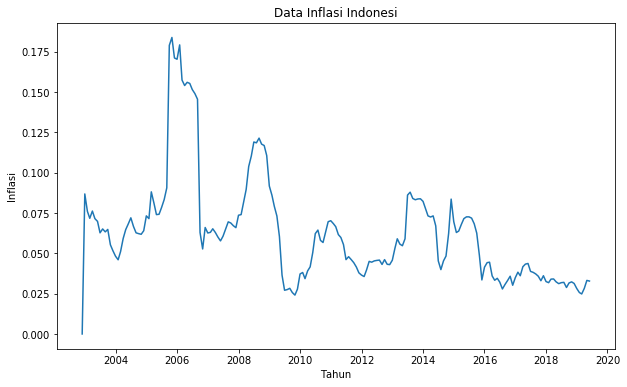

In [40]:
#ploting data inflasi dari tahun 2002 hingga 2019
register_matplotlib_converters() #konversi tanggal agar mudah di kenali pada python 3 (matplotlib)
plt.figure(figsize=(10,6))
plt.plot(dataset_inflasi['Tanggal'],dataset_inflasi['Inflasi'])

plt.title('Data Inflasi Indonesia')
plt.ylabel('Inflasi')
plt.xlabel('Tahun')
plt.show() 

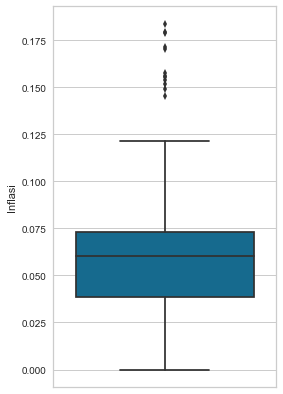

In [115]:
plt.figure(figsize=(4,7))
sns.boxplot( x= 'Inflasi',  data=dataset_inflasi, orient='v');

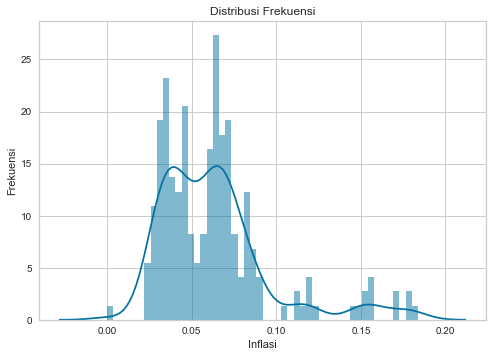

In [128]:
ax=sns.distplot(dataset_inflasi['Inflasi'],color='b', bins=50, hist_kws={'alpha': 0.5}) #Frekuensi distribusi
ax.set(title="Distribusi Frekuensi",xlabel='Inflasi', ylabel='Frekuensi')
plt.show()

# Analisis Prediktif 

In [94]:
#import library sklearn untuk analisis klastering
from sklearn.cluster import KMeans

#Inisialisasi data inflasi utuk proses klastering
X = dataset_inflasi[['Inflasi']]

#klasterisasi menngunakanan 3 center
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

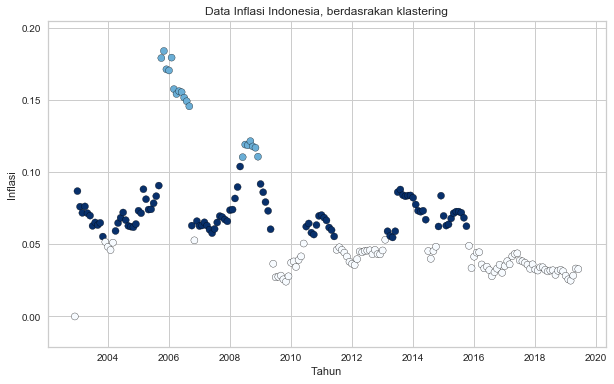

In [123]:
# Plotting the cluster centers and the data points on a 2D plane
plt.figure(figsize=(10,6))
plt.scatter(dataset_inflasi['Tanggal'],X.iloc[:, 0],c=kmeans.labels_,cmap="Blues", edgecolors="black")
plt.title('Data Inflasi Indonesia, berdasrakan klastering')
plt.ylabel('Inflasi')
plt.xlabel('Tahun')
plt.show()

In [98]:
#menambahkan variable hasil klasterisasi memberikan label baru mengenai informasi kalsifikasi inflasi
t=pd.DataFrame()
t['Label_Inflasi']=kmeans.labels_

In [100]:
dataset_inflasi = dataset_inflasi.join(t)

### Note : 
Klasifikasi inflasi indonsia termuat dalam variable <b>Label_Inflasi</b> dapat di bagi menjadi 3 klasifikasi, inflasi rendah (0), inflasi sedang (1) dan inflasi tinggi (2)

In [104]:
dataset_inflasi.head(10)

,Tanggal,Inflasi,Label_Inflasi
0,2002-12-01,0.0000,0
1,2003-01-01,0.0868,2
2,2003-02-01,0.0760,2
3,2003-03-01,0.0717,2
4,2003-04-01,0.0762,2
5,2003-05-01,0.0715,2
6,2003-06-01,0.0698,2
7,2003-07-01,0.0627,2
8,2003-08-01,0.0651,2
9,2003-09-01,0.0633,2


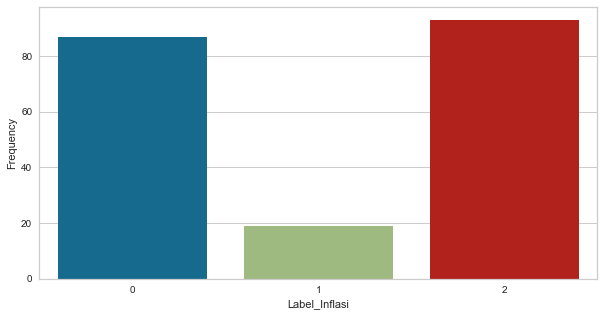

In [114]:
#Distribusi frekuensi inflasi berdasarkan pada Label_Inflasi 

group_by_year = pd.DataFrame(dataset_inflasi.Inflasi.groupby([dataset_inflasi['Label_Inflasi']]).count())
group_by_year.columns = ['Frequency']

plt.figure(figsize=(10,5))
by_year = sns.barplot(x=group_by_year.index, y=group_by_year.Frequency)